In [4]:
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage import img_as_float
from skimage.measure import compare_psnr
from pylab import imshow
from sklearn.cluster import KMeans

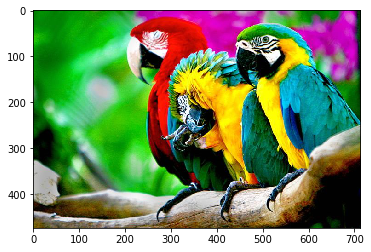

In [5]:
image = imread('data/parrots.jpg')
img = img_as_float(image)
imshow(img)

In [6]:
shape = img.shape
original = np.reshape(img, (shape[0] * shape[1], shape[2]))
df = pd.DataFrame(original, columns=['R', 'G', 'B'])
df.head()

,R,G,B
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


In [7]:
n_clusters=12

km = KMeans(n_clusters=n_clusters, init='k-means++', random_state=241)
km.fit(df)

means = []
medians = []
labels = km.labels_

for i in range(n_clusters):
    cluster = df.loc[labels == i]
    means.append(cluster.mean().tolist())
    medians.append(cluster.median().tolist())
    
img_mean = np.array([means[i] for i in labels])
psnr_mean = compare_psnr(original, img_mean)

img_median = np.array([medians[i] for i in labels])
psnr_median = compare_psnr(original, img_median)

print(psnr_mean, psnr_median)

20.5925163195166 20.304411065558547


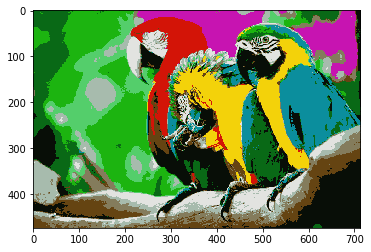

In [8]:
imshow(np.reshape([means[i] for i in labels], shape))